In [ ]:
!python -m pip install --upgrade 'sqlalchemy<2.0’

/bin/bash: -c: line 0: unexpected EOF while looking for matching `''
/bin/bash: -c: line 1: syntax error: unexpected end of file


In [ ]:
# Импортируем необходимые библиотеки
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 

In [ ]:
# Создаем датафрейм из исходного файла
df = pd.read_excel('Кондратьев_(FPS-21)_Практ. зад. Регресс. анализ.xlsx')
df.head()

,date,country,confirmed,deaths
0,2020-01-22,Russia,0,0
1,2020-01-22,US,1,0
2,2020-01-23,Russia,0,0
3,2020-01-23,US,1,0
4,2020-01-24,Russia,0,0


In [ ]:
# Формирование выборок
df_1 = df[df['country'] == 'Russia'] # Создаем датафрейм с данными по стране 'Russia' (Россия)
df_2 = df[df['country'] == 'US'] # Создаем датафрейм с данными по полу 'US' (США)
# Сравниваем датафреймы между собой 
print('Выборкки имеют одинаковую длинну: ', len(df_1) == len(df_2)) # Выводим на печать нужный текст с получившимся результатом сравнения 

Выборкки имеют одинаковую длинну:  True


In [ ]:
# Описательные статистики (Россия)
df_1.describe()

,confirmed,deaths
count,5.580000e+02,558.000000
mean,2.300445e+06,48404.983871
std,2.010516e+06,47780.244038
min,0.000000e+00,0.000000
25%,4.867282e+05,6188.000000
50%,1.528971e+06,26250.500000
75%,4.348391e+06,90858.000000
max,6.207513e+06,156726.000000


In [ ]:
# Описательные статистики (США)
df_2.describe()

,confirmed,deaths
count,5.580000e+02,558.000000
mean,1.471734e+07,290682.942652
std,1.321288e+07,216562.312760
min,1.000000e+00,0.000000
25%,1.984974e+06,115109.250000
50%,8.767904e+06,227006.000000
75%,2.948581e+07,536045.000000
max,3.500342e+07,613228.000000


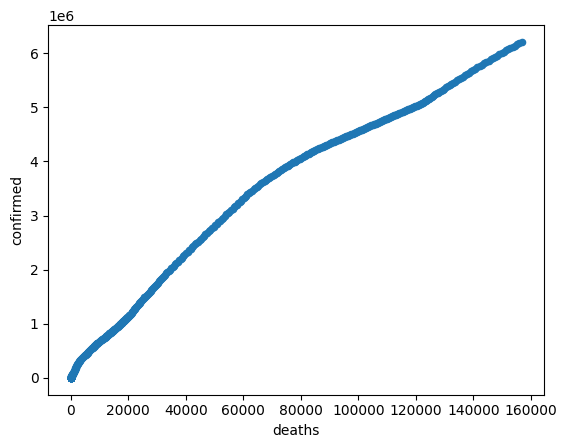

In [ ]:
df_1.plot.scatter(x="deaths", y="confirmed"); # Визуализируем корреляцию заболеваемости и смертности в России

In [ ]:
# Корреляция между заболеваемостью и смертностью в России
df_1['confirmed'].corr(df['deaths'])

0.9899097893370321

In [ ]:
# Матрица корреляции средствами pandas Россия
df_1.corr()

<ipython-input-358-66dc6a93d436>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_1.corr()


,confirmed,deaths
confirmed,1.00000,0.98991
deaths,0.98991,1.00000


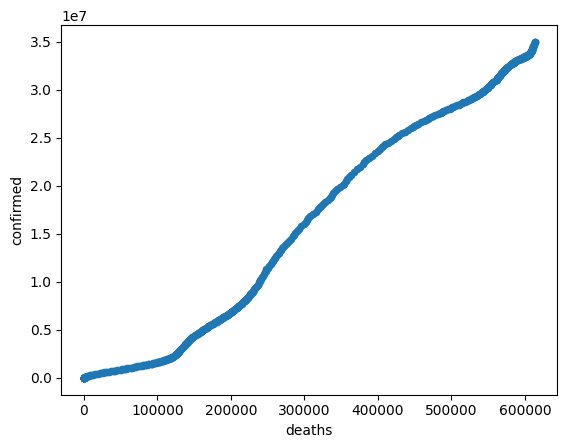

In [ ]:
df_2.plot.scatter(x="deaths", y="confirmed"); # Визуализируем корреляцию заболеваемости и смертности в США 


In [ ]:
# Корреляция между заболеваемостью и смертностью в США
df_2['confirmed'].corr(df['deaths'])

0.991262267038534

In [ ]:
# Матрица корреляции средствами pandas США
df_2.corr().style.background_gradient(cmap='coolwarm')

<ipython-input-361-9c64541a9616>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_2.corr().style.background_gradient(cmap='coolwarm')


,confirmed,deaths
confirmed,1.000000,0.991262
deaths,0.991262,1.000000


## Построение Линейной регрессии

In [ ]:
# Формирование выборок заболеваемости и смертности для России
X_1 = df_1[['confirmed']] # Создаем переменную с признаком
y_1 = df_1[['deaths']] # Создаем переменную целевой (что будем предсказывать)

In [ ]:
from sklearn.linear_model import LinearRegression # Подключение библиотеки и модуля (LinearRegression) Линейной регрессии
regressor = LinearRegression()                    # Инициализация Линейной регрессии - создаем переменную regressor, записываем в неё модуль LinearRegression
regressor.fit(X_1, y_1)                               # Обучение Линейной регрессии. Задаем в fit(, y) сначала X признаки, после Y цель предсказаний 

LinearRegression()

In [ ]:
# Коэффициент прямой (проверка обучения)
a_1 = regressor.intercept_ # Выведем Коэффициент и запишем в переменную
a_1

array([-5713.82792078])

In [ ]:
# Коэффициент наклона прямой (проверка обучения)
b_1 = regressor.coef_ # Выведем Коэффициент и запишем в переменную
b_1

array([[0.02352537]])

In [ ]:
Height_pred_1 = 25000000                     # Создаем переменную и записываем в нее количество (заболеваний) для которых хотим сделать предсказание 
regressor.predict([[Height_pred_1]])         # Обращаемся к обученой модели regressor применяем к ней метод predict, указываем переменную Height_pred_1

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[582420.3846451]])

In [ ]:
# Получение прогноза "в лоб" по уровнению прямой регрессии a + bx
a_1 + b_1 * Height_pred_1

array([[582420.3846451]])

Аналогичное построение регрессии для США

In [ ]:
# Формирование выборок заболеваемости и смертности для США
X_2 = df_2[['confirmed']]
y_2 = df_2[['deaths']]

regressor = LinearRegression()                    # Инициализация Линейной регрессии
regressor.fit(X_2, y_2)                               # Обучение Линейной регрессии

# Коэффициент прямой
a_2 = regressor.intercept_
a_2

array([51569.98985381])

In [ ]:
# Коэффициент наклона прямой
b_2 = regressor.coef_
b_2

array([[0.01624702]])

In [ ]:
Height_pred_2 = 25000000                     # Создаем переменную и записываем в нее количество (заболеваний) для которых хотим сделать предсказание 
regressor.predict([[Height_pred_2]])        # Обращаемся к обученой модели regressor применяем к ней метод predict, указываем переменную Height_pred_2

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[457745.59798565]])

### Вывод


In [ ]:
# Высокий коффициент корреляции
# Если число заболеваний в России достигнет уровня 25 000 000, то можно прогназировать смертность в районе 582 000 человек. 